In [1]:
import keras

Using TensorFlow backend.


In [2]:
#Boston house price prediction data
from keras.datasets import boston_housing
((train_data,train_targets),(test_data,test_targets)) = boston_housing.load_data()


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
'''1.Per capita crime rate.
2.Proportion of residential land zoned for lots over 25,000 square feet.
3.Proportion of non-retail business acres per town.
4.Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5.Nitric oxides concentration (parts per 10 million).
6.Average number of rooms per dwelling.
7.Proportion of owner-occupied units built prior to 1940.
8.Weighted distances to five Boston employment centres.
9.Index of accessibility to radial highways.
10.Full-value property-tax rate per $10,000.
11.Pupil-teacher ratio by town.
12.1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13.% lower status of the population.'''
#13 features features in the input data.

'1.Per capita crime rate.\n2.Proportion of residential land zoned for lots over 25,000 square feet.\n3.Proportion of non-retail business acres per town.\n4.Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).\n5.Nitric oxides concentration (parts per 10 million).\n6.Average number of rooms per dwelling.\n7.Proportion of owner-occupied units built prior to 1940.\n8.Weighted distances to five Boston employment centres.\n9.Index of accessibility to radial highways.\n10.Full-value property-tax rate per $10,000.\n11.Pupil-teacher ratio by town.\n12.1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.\n13.% lower status of the population.'

In [6]:
train_data

array([[  1.23247000e+00,   0.00000000e+00,   8.14000000e+00, ...,
          2.10000000e+01,   3.96900000e+02,   1.87200000e+01],
       [  2.17700000e-02,   8.25000000e+01,   2.03000000e+00, ...,
          1.47000000e+01,   3.95380000e+02,   3.11000000e+00],
       [  4.89822000e+00,   0.00000000e+00,   1.81000000e+01, ...,
          2.02000000e+01,   3.75520000e+02,   3.26000000e+00],
       ..., 
       [  3.46600000e-02,   3.50000000e+01,   6.06000000e+00, ...,
          1.69000000e+01,   3.62250000e+02,   7.83000000e+00],
       [  2.14918000e+00,   0.00000000e+00,   1.95800000e+01, ...,
          1.47000000e+01,   2.61950000e+02,   1.57900000e+01],
       [  1.43900000e-02,   6.00000000e+01,   2.93000000e+00, ...,
          1.56000000e+01,   3.76700000e+02,   4.38000000e+00]])

In [7]:
train_targets

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

In [ ]:
# preparing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [9]:
#normalized
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ..., 
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [26]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold - ',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_target = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data,partial_train_target,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    

processing fold -  0
processing fold -  1
processing fold -  2
processing fold -  3


In [27]:
all_scores


[1.9286645544637548,
 2.3523557917906506,
 2.7124367964149703,
 2.4032643195426111]

In [28]:
np.mean(all_scores)

2.3491803655529968

In [29]:
from keras import backend as K
K.clear_session()

In [31]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold - ',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_target = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partial_train_target,epochs=num_epochs,batch_size=1,verbose=0)
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold -  0
processing fold -  1
processing fold -  2
processing fold -  3


In [25]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

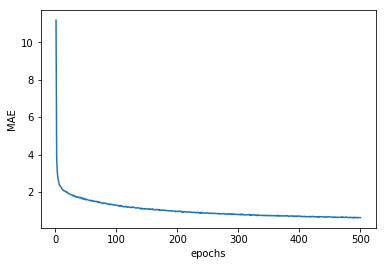

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.show()

In [22]:
#val_mae error
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 586us/step


In [23]:
test_mae_score


2.8997588905633664